Mediacal Corpus EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import json
import os
from transformers import pipeline
from transformers import pipeline, AutoTokenizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
datapath= '/content/drive/MyDrive/Capstone210/medical_corpus_train.csv'

In [7]:
# Define the file path
datapath = '/content/drive/MyDrive/Capstone210/medical_corpus_train.csv'

# Check if the file exists
if not os.path.exists(datapath):
    print(f"Error: File not found at path: {datapath}")
else:
    # Step 1: Inspect the Problematic Row and check for issues
    try:
        # Attempt to read the file with the 'on_bad_lines' parameter to identify bad rows
        df = pd.read_csv(datapath, on_bad_lines='warn', encoding='utf-8')
    except pd.errors.ParserError as e:
        print(f"Failed to read csv with error {e}")
        # Open the file in read mode.
        with open(datapath, 'r', encoding='utf-8') as file:
            # Read the file row by row
            rows = file.readlines()
            for index, row in enumerate(rows):
                if index == 4530:
                  print(f"Checking row: {index}\n")
                  print(row)
                  print("--------------------------------------------------------------------------------------")
                  print("The issue most likely happens on this line or before it, the line has an unclosed quote")
                  print("--------------------------------------------------------------------------------------")
                  break
    else:
      print('Successfully read in file with warning')
      print(df.head())


    # Step 2: Diagnose File Line Endings
    with open(datapath, 'r', encoding='utf-8') as file:
        first_line_terminator = file.readline()[-2:]  # Read the first line to check the line terminator

    # Check if the file has consistent line endings
    with open(datapath, 'r', encoding='utf-8') as file:
      for row in file.readlines():
        row_terminator = row[-2:]
        if first_line_terminator != row_terminator:
          print(f"Inconsistent line terminators in file: {row_terminator} and {first_line_terminator}")
          break
      else:
        print(f"File line terminators are consistent with {first_line_terminator}")

Failed to read csv with error Error tokenizing data. C error: EOF inside string starting at row 4530
Checking row: 4530

[|Human|] I just took a shower and before I shaved one of my underarms I began to clean the deodorant residue from this morning off and as I rubbed it off in the shower this black ball of puss which was hard oozed out from the lower part of my underarm. I squeezed some more and a little more came out. After there was just a jelly if what seems to be a blood cot from this open pore. Its the area on the outer edge of my underarm. I cleaned the area with an antiseptic wipe and put some neosporin on it. Is this something to be worried about? What is it?

--------------------------------------------------------------------------------------
The issue most likely happens on this line or before it, the line has an unclosed quote
--------------------------------------------------------------------------------------
Inconsistent line terminators in file: .
 and n



In [11]:
# Open the file and check the problematic row
with open(datapath, "r") as file:
    for i, line in enumerate(file):
        if i == 4530:  # Check row 4530
            print(f"Row {i}: {line}")

Row 4530: [|Human|] I just took a shower and before I shaved one of my underarms I began to clean the deodorant residue from this morning off and as I rubbed it off in the shower this black ball of puss which was hard oozed out from the lower part of my underarm. I squeezed some more and a little more came out. After there was just a jelly if what seems to be a blood cot from this open pore. Its the area on the outer edge of my underarm. I cleaned the area with an antiseptic wipe and put some neosporin on it. Is this something to be worried about? What is it?



In [13]:
# Automatically clean the CSV file by removing rows with unbalanced quotes

output_file = '/content/drive/MyDrive/Capstone210/medicalcorpustrain.csv'

with open(datapath, "r") as infile, open(output_file, "w") as outfile:
    for line in infile:
        # Check for unbalanced quotes
        if line.count('"') % 2 == 0:  # Even number of quotes is valid
            outfile.write(line)       # Write valid rows to the new file
        else:
            print(f"Skipped malformed row: {line.strip()}")  # Log skipped rows



Skipped malformed row: "The conversation between human and AI assistant.
Skipped malformed row: "
Skipped malformed row: "The conversation between human and AI assistant.
Skipped malformed row: "
Skipped malformed row: "The conversation between human and AI assistant.
Skipped malformed row: "
Skipped malformed row: "The conversation between human and AI assistant.
Skipped malformed row: "
Skipped malformed row: "The conversation between human and AI assistant.
Skipped malformed row: "
Skipped malformed row: "The conversation between human and AI assistant.
Skipped malformed row: "
Skipped malformed row: "The conversation between human and AI assistant.
Skipped malformed row: "
Skipped malformed row: "The conversation between human and AI assistant.
Skipped malformed row: "
Skipped malformed row: "The conversation between human and AI assistant.
Skipped malformed row: "
Skipped malformed row: "The conversation between human and AI assistant.
Skipped malformed row: "
Skipped malformed ro

In [25]:
# Load the cleaned file into Pandas
import re
# Read the conversational data from a file
input_file = '/content/drive/MyDrive/Capstone210/medical_corpus_train.csv'
data = []


# Open the file and process it line by line
with open(input_file, "r", encoding="utf-8") as file:
    for line in file:
        # Check if the line starts with a speaker tag
        if line.startswith("[|Human|]"):
            speaker = "Human"
            message = line.split("[|Human|]", 1)[1].strip()  # Extract the message after the tag
            data.append({"Speaker": speaker, "Message": message})
        elif line.startswith("[|AI|]"):
            speaker = "AI"
            message = line.split("[|AI|]", 1)[1].strip()  # Extract the message after the tag
            data.append({"Speaker": speaker, "Message": message})


In [26]:
# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

# Save to a CSV file if needed
df.to_csv("/content/drive/MyDrive/Capstone210/medicalcorpustrain.csv", index=False)

     Speaker                                            Message
0      Human  Hi.My names Ahdieh.I m from a small city in Ir...
1         AI  Hello Addie! Welcome and thank you for asking ...
2      Human  Hello and thank you for your time and assistan...
3         AI  Hi, You need to focus more on doing exercises ...
4      Human  Yes! I had double knee replacements on Feb. 20...
...      ...                                                ...
9055      AI  Hello, Type 2 diabetes mellitus is due to insu...
9056   Human  hello doc..I got my chest xray result the Impr...
9057      AI  Thanks for your question I completely understa...
9058   Human  hi i have been feeling very tired for a few da...
9059      AI  Hi.it is best if you sought consult with a gas...

[9060 rows x 2 columns]


In [27]:
# Select a specific record by index (e.g., the first record)
record = df.iloc[0]  # Replace 0 with the index of the desired record

# Print the full text of the record
pd.set_option("display.max_colwidth", None)  # Ensure no truncation
print(record)

Speaker                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Human
Message    Hi.My names Ahdieh.I m from a small city in Iran.My father had a heart attack on sunday as doctor said cpr condition.after 40 minuts he came back to life. now he isnot conscious.he is in ICU.his doctor said his conscious rate is 5.what do you think about his condition?If it is needed I can send you his cardiograf and blood test and the drugs they are using for him in ICU.Kindly tell me can we carry him to a better hospital in Tehran(It takes 4 hours to reach there)?
Name: 0, dtype: object


In [29]:
print(f"Dataset shape: {df.shape}")


Dataset shape: (9060, 2)


In [30]:
# Data types and summary statistics
print(df.info())
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9060 entries, 0 to 9059
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Speaker  9060 non-null   object
 1   Message  9060 non-null   object
dtypes: object(2)
memory usage: 141.7+ KB
None
Missing Values per Column:
 Speaker    0
Message    0
dtype: int64


In [31]:
df.describe(include="all").T

,count,unique,top,freq
Speaker,9060,2,Human,4530
Message,9060,9052,Hi... Thank you for consulting in Chat Doctor. It seems your kid is having viral diarrhea. Once it starts it will take 5-7 days to completely get better. Unless the kids having low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting...you need not worry. There is no need to use antibiotics unless there is blood in the motion. Antibiotics might worsen if unnecessarily used causing antibiotic associated diarrhea. I suggest you use zinc supplements (Z&D Chat Doctor.,4


## Examine Pathology

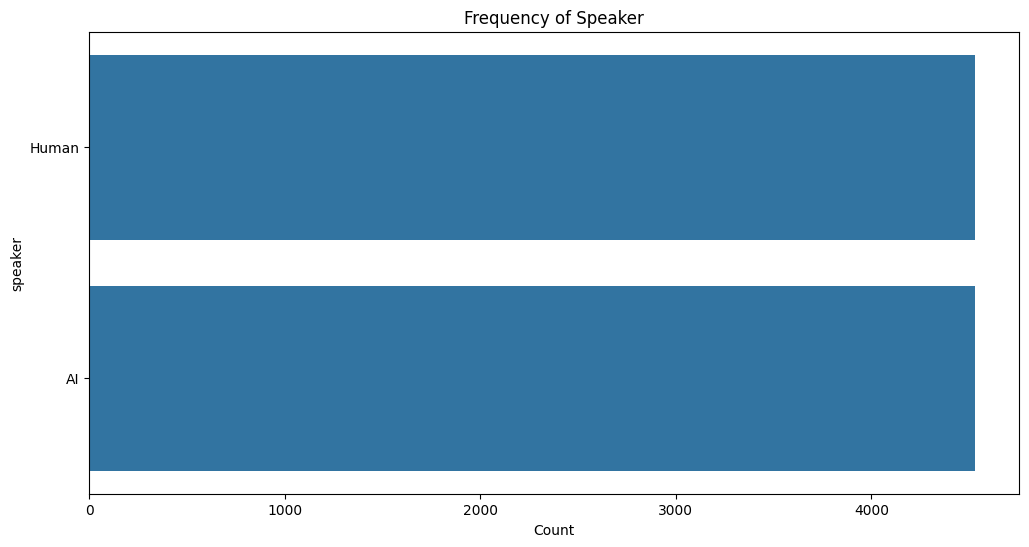

In [33]:
plt.figure(figsize=(12, 6))
order = df['Speaker'].value_counts().index
sns.countplot(y='Speaker', data=df, order=order)
plt.title("Frequency of Speaker")
plt.xlabel("Count")
plt.ylabel("speaker")
plt.show()


## Processing and Analyzing the Differential Diagnosis

In [38]:
# -------------------------------
# 1. Load the Data
# -------------------------------

# Adjust the file path as necessary
#df = pd.read_csv("release_train_patients.csv")
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# -------------------------------
# 2. Basic Overview and Data Quality Checks
# -------------------------------

print("\nData Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe(include="all"))

print("\nMissing values per column:")
missing_values = df.isnull().sum()
print(missing_values)



Dataset shape: (9060, 2)

First 5 rows:
  Speaker  \
0   Human   
1      AI   
2   Human   
3      AI   
4   Human   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

'\n## b. Message Distribution\n\nprint("\nMessage Distribution:")\nMessage_counts = df[\'Message\'].value_counts()\nprint(Message_counts)\n\nplt.figure(figsize=(6, 4))\nsns.countplot(x=\'Message\', data=df)\nplt.title("Message Distribution")\nplt.xlabel("Message")\nplt.ylabel("Count")\nplt.show()\n\n# -------------------------------\n# 4. Examine Pathology\n# -------------------------------\n\nprint("\nSpeaker Distribution:")\nspeaker_counts = df[\'Speaker\'].value_counts()\nprint(speaker_counts)\n\nplt.figure(figsize=(12, 6))\norder = speaker_counts.index\nsns.countplot(y=\'Speaker\', data=df, order=order)\nplt.title("Frequency of Speaker")\nplt.xlabel("Count")\nplt.ylabel("Speaker")\nplt.show()\n\n# -------------------------------\n# 5. Processing and Analyzing the Differential Diagnosis\n# -------------------------------\n\n# Convert DIFFERENTIAL_DIAGNOSIS from string representation to a Python list (if needed)\ndef parse_diff_diag(x):\n    try:\n        if isinstance(x, list):\n   

# DATA Cleaning

In [39]:
def make_hashable(obj):
    # If the object is a list or tuple, recursively convert each element and return a tuple.
    if isinstance(obj, (list, tuple)):
        return tuple(make_hashable(item) for item in obj)
    elif isinstance(obj, dict):
        # Convert dictionary into a sorted tuple of key-value pairs.
        return tuple(sorted((k, make_hashable(v)) for k, v in obj.items()))
    else:
        return obj

# Create a copy to avoid modifying the original DataFrame
df_clean = df.copy()

# Apply the recursive conversion to ALL columns in the DataFrame.
# (This ensures that if any cell in any column contains a list, it will be converted.)
for col in df_clean.columns:
    df_clean[col] = df_clean[col].apply(make_hashable)

# Now check for duplicates:
print("Duplicate Rows:", df_clean.duplicated().sum())

# Drop duplicate rows
df_clean = df_clean.drop_duplicates()
print("Dataset shape after dropping duplicates:", df_clean.shape)


Duplicate Rows: 8
Dataset shape after dropping duplicates: (9052, 2)


In [40]:
# Simply print the columns
print(df_clean.columns)

# Or convert them to a list and print
columns_list = list(df_clean.columns)
print("Columns:", columns_list)


Index(['Speaker', 'Message'], dtype='object')
Columns: ['Speaker', 'Message']


In [41]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9052 entries, 0 to 9059
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Speaker  9052 non-null   object
 1   Message  9052 non-null   object
dtypes: object(2)
memory usage: 212.2+ KB


In [42]:
# Summary of text lengths in the "Message" column
df_clean["Message_length"] = df["Message"].apply(len)
print(df_clean["Message_length"].describe())

count    9052.000000
mean      542.465753
std       265.952457
min         2.000000
25%       356.000000
50%       484.000000
75%       649.000000
max      2918.000000
Name: Message_length, dtype: float64


<ipython-input-55-9fe101bcddb0>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Speaker", loc="upper right", fontsize=12, title_fontsize=13)


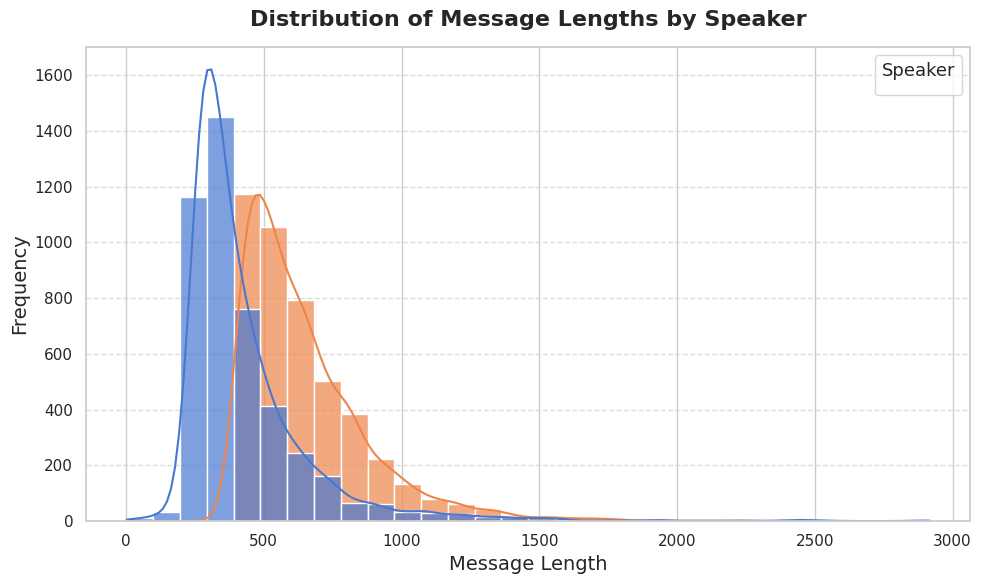

In [55]:
# Set Seaborn style and color palette
sns.set_theme(style="whitegrid")  # Choose a clean theme
palette = "muted"  # Choose a visually appealing color palette

# Create the plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(
    data=df_clean,
    x="Message_length",
    hue="Speaker",
    kde=True,
    palette=palette,
    bins=30,  # Adjust the number of bins for better granularity
    alpha=0.7  # Set transparency to make overlapping areas clearer
)

# Customize plot labels and title
plt.title("Distribution of Message Lengths by Speaker", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Message Length", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Add a legend and customize its location
plt.legend(title="Speaker", loc="upper right", fontsize=12, title_fontsize=13)

# Add gridlines for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [45]:
# Add a column for word count
df_clean["Word_count"] = df_clean["Message"].apply(lambda x: len(x.split()))

# Average word count per speaker
print(df_clean.groupby("Speaker")["Word_count"].mean())

Speaker
AI       109.905130
Human     83.422075
Name: Word_count, dtype: float64


In [47]:
from collections import Counter
from nltk.corpus import stopwords
import nltk

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Function to get most common words
def get_common_words(messages, n=10):
    all_words = " ".join(messages).lower().split()
    filtered_words = [word for word in all_words if word not in stop_words]
    return Counter(filtered_words).most_common(n)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<ipython-input-49-d9923fc49788>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette="viridis")


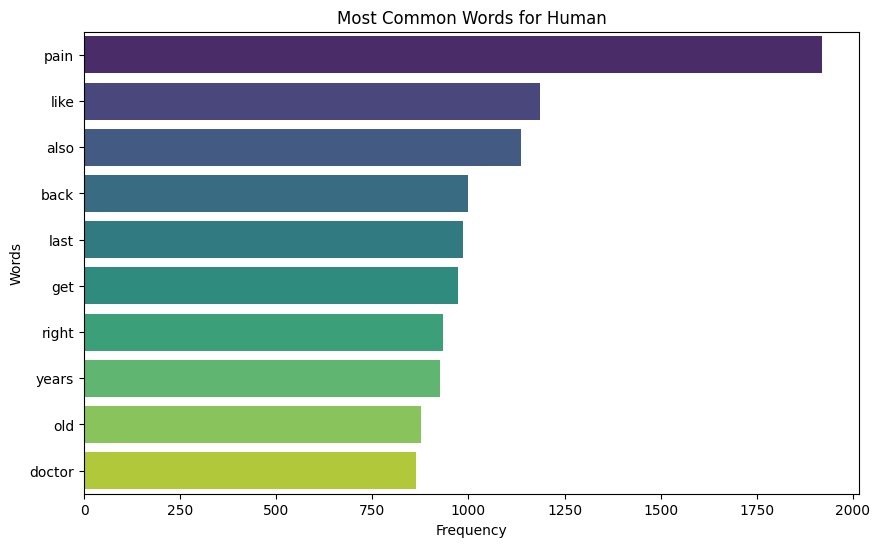

<ipython-input-49-d9923fc49788>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette="viridis")


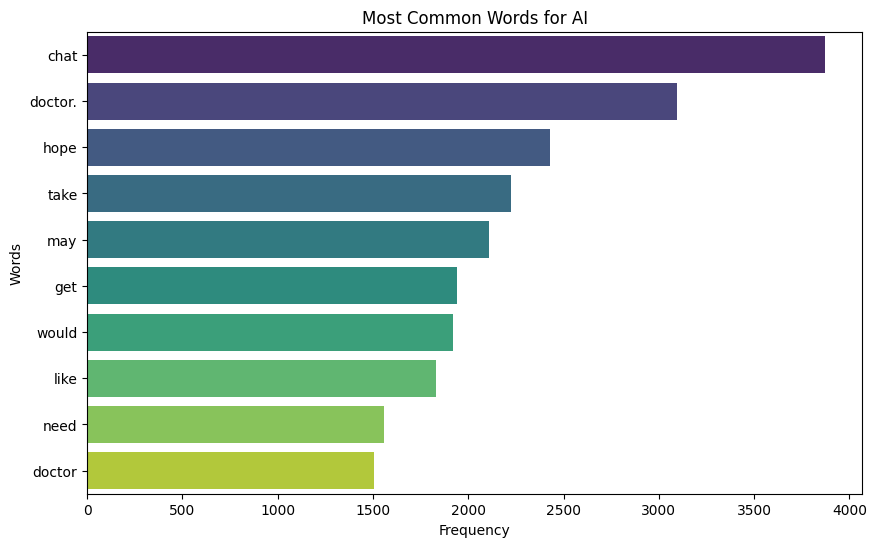

In [49]:

# Loop through each unique speaker and plot their most common words
for speaker in df["Speaker"].unique():
    # Get messages for the speaker
    messages = df[df["Speaker"] == speaker]["Message"]

    # Get the most common words
    common_words = get_common_words(messages)

    # Prepare data for plotting
    words = [word for word, count in common_words]
    counts = [count for word, count in common_words]

    # Create a bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts, y=words, palette="viridis")
    plt.title(f"Most Common Words for {speaker}")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

         Sentiment_polarity  Sentiment_subjectivity
Speaker                                            
0                  0.015624                0.395647
1                  0.151812                0.458457


<ipython-input-57-eb35b3c2a554>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


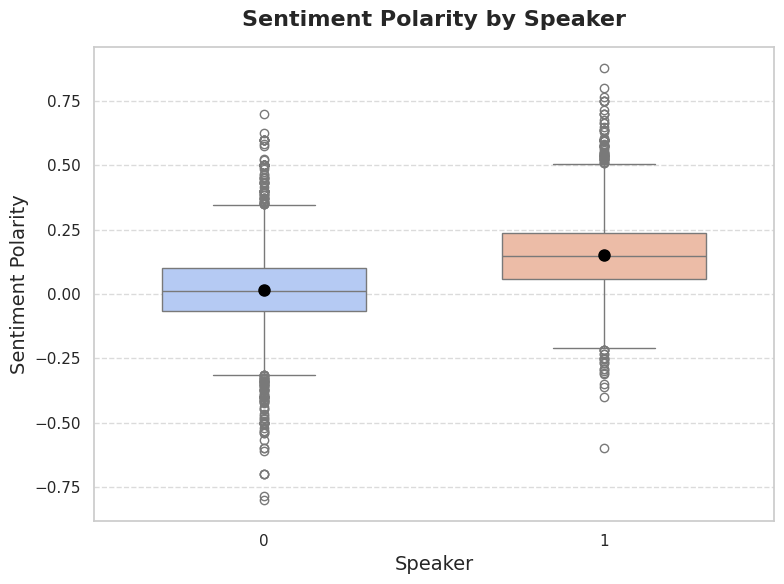

In [57]:
from textblob import TextBlob

# Add sentiment polarity and subjectivity
df_clean["Sentiment_polarity"] = df_clean["Message"].apply(lambda x: TextBlob(x).sentiment.polarity)
df_clean["Sentiment_subjectivity"] = df_clean["Message"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Average sentiment per speaker
print(df_clean.groupby("Speaker")[["Sentiment_polarity", "Sentiment_subjectivity"]].mean())
# Set Seaborn theme
sns.set_theme(style="whitegrid")  # Clean and professional style

# Create the plot
plt.figure(figsize=(8, 6))  # Adjust figure size
sns.boxplot(
    data=df_clean,
    x="Speaker",
    y="Sentiment_polarity",
    palette="coolwarm",  # Use a visually appealing color palette
    width=0.6,  # Adjust box width for better appearance
    showmeans=True,  # Show the mean value as a marker
    meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black", "markersize": 8}
)

# Add title and labels with improved font sizes
plt.title("Sentiment Polarity by Speaker", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Speaker", fontsize=14)
plt.ylabel("Sentiment Polarity", fontsize=14)

# Customize gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

In [51]:
'''
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text
vectorizer = CountVectorizer(stop_words="english", max_features=5000)
X = vectorizer.fit_transform(df_clean["Message"])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=132)  # Adjust the number of topics
lda.fit(X)

# Print the top words for each topic
words = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Topic {i+1}:")
    print([words[i] for i in topic.argsort()[-10:]])
'''
#not quite understand the topics

Topic 1:
['years', 'having', 'time', 'feel', 'ago', 'left', 'just', 'right', 'like', 'pain']
Topic 2:
['surgery', 'chat', 'query', 'hi', 'cancer', 'good', 'help', 'hope', 'doctor', 'treatment']
Topic 3:
['question', 'query', 'like', 'cause', 'need', 'thanks', 'hope', 'blood', 'chat', 'doctor']
Topic 4:
['treatment', 'thanks', 'hi', 'pain', 'like', 'hope', 'query', 'infection', 'chat', 'doctor']
Topic 5:
['taking', 'normal', 'time', 'period', 'hi', 'doctor', 'old', 'years', 'day', 'days']


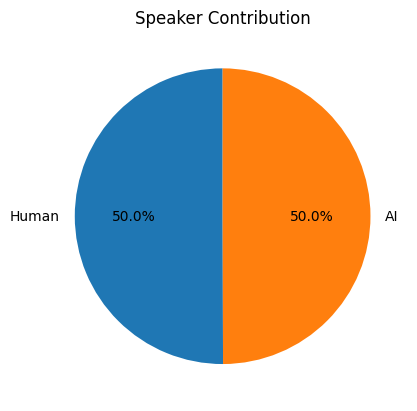

In [52]:
# Pie chart for speaker distribution
df_clean["Speaker"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Speaker Contribution")
plt.ylabel("")
plt.show()